# Training Models

In  this  chapter  we  will  start  by  looking  at  the  Linear  Regression  model,  one  of  the simplest models there is. We will discuss two very different ways to train it:

- Using a direct “closed-form” equation that directly computes the model parameters  that  best  fit  the  model  to  the  training  set  (i.e.,  the  model  parameters  that minimize the cost function over the training set).

- Using  an  iterative  optimization  approach  called  Gradient  Descent  (GD)  that gradually  tweaks  the  model  parameters  to  minimize  the  cost  function  over  thetraining  set,  eventually  converging  to  the  same  set  of  parameters  as  the  firstmethod. We will look at a few variants of Gradient Descent that we will use againand again when we study neural networks: Batch GD, Mini-batch GD,and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit non‐linear  datasets.  Since  this  model  has  more  parameters  than  Linear  Regression,  it  is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set. Finally,  we  will  look  at  two  more  models  that  are  commonly  used  for  classification tasks: 

- Logistic Regression and 
- Softmax Regression.

**!!! Some values in the output may not match with the image example**

## Linear Regression



The general linera regression eqn can be represented as:

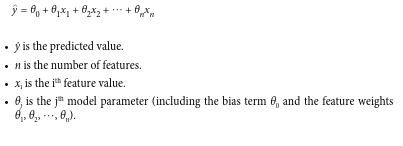

Representing in vectorized form:
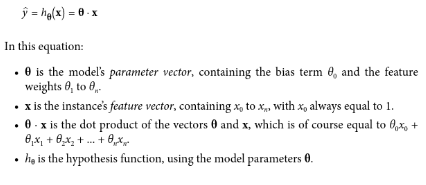

For error calculation we generally Mean Squared Error, mathematically:

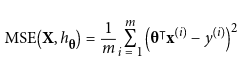

To  simplify  notations,  we  will  just  write  MSE(θ) instead of MSE(X, hθ).

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Normal Equation:

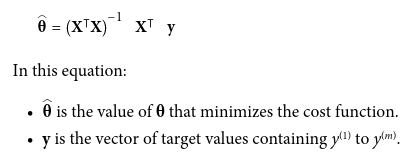

Let’s generate some linear-looking data.

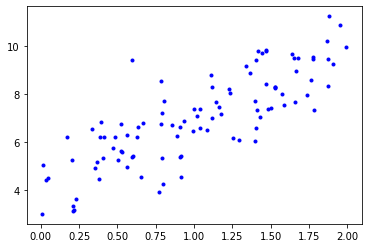

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

Now let’s compute θ using the Normal Equation. We will use the *inv()* function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, andthe *dot()* method for matrix multiplication. **!!! θ-cap is represented as θ**

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The  function  that  we  used  to  generate  the  data  is  y  =  4  +  3x1  +  Gaussian  noise.  Let’s see what the equation found:

In [3]:
theta_best

array([[4.1864781 ],
       [2.79171502]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.069 and θ1 = 2.900. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now, we can make predictions using θ.

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1864781 ],
       [9.76990814]])

Let's plot the model's predictions.

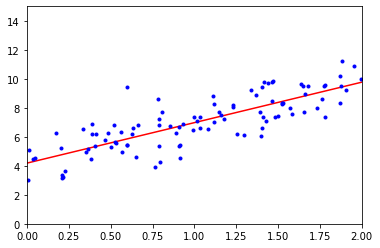

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple too.

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.1864781]), array([[2.79171502]]))

The  *LinearRegression*  class  is  based  on  the  *scipy.linalg.lstsq()*  function  (the name stands for “least squares”), which we could call directly.|

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.1864781 ],
       [2.79171502]])

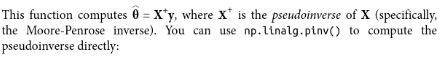

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.1864781 ],
       [2.79171502]])

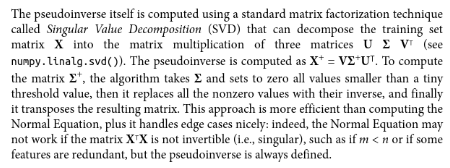

### Computational Complexity

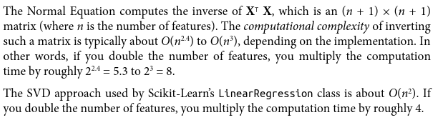

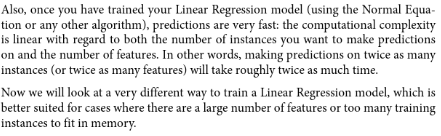

### Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions  to  a  wide  range  of  problems.  The  general  idea  of  Gradient  Descent  is  to  tweak parameters iteratively in order to minimize a cost function.
<br/>
Concretely, you start by filling θ with random values (this is called random initializa‐tion).  Then  you  improve  it  gradually,  taking  one  baby  step  at  a  time,  each  stepattempting to decrease the cost function (e.g., the MSE), until the algorithm convergesto a minimu.

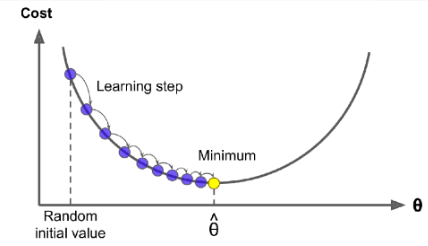

Gradient Descent can sometime stuck in local minima but fortunately,  the  MSE  cost  function  for  a  Linear  Regression  model  happens  to  be  aconvex  function,  which  means  that  if  you  pick  any  two  points  on  the  curve,  the  line segment  joining  them  never  crosses  the  curve.  This  implies  that  there  are  no  local minima,  just  one  global  minimum.  It  is  also  a  continuous  function  with  a  slope  that never changes abruptly( Technically speaking, its derivative is Lipschitz continuous). These two facts have a great consequence: Gradient Descentis  guaranteed  to  approach  arbitrarily  close  the  global  minimum  (if  you  wait  long enough and if the learning rate is not too high).
<br/>
When  using  Gradient  Descent,  you  should  ensure  that  all  features have  a  similar  scale  (e.g.,  using  Scikit-Learn’s  StandardScalerclass), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function  with  regard  to  each  model  parameter  θj.  In  other  words,  you  need  to  calculate how much the cost function will change if you change θj just a little bit. This is calleda partial derivative. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all otherd imensions, if you can imagine a universe with more than three dimensions).

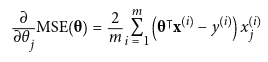

Instead of computing these partial derivatives individually, you can use Equation below to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).

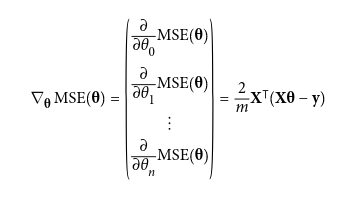

Notice that this formula involves calculations over the full training set  X,  at  each  Gradient  Descent  step!  This  is  why  the  algorithm  is called  Batch  Gradient  Descent:  it  uses  the  whole  batch  of  training data  at  every  step  (actually,  Full  Gradient  Descent  would  probablybe a better name). As a result it is terribly slow on very large training  sets  (but  we  will  see  much  faster  Gradient  Descent  algorithmsshortly). However, Gradient Descent scales well with the number of features;  training  a  Linear  Regression  model  when  there  are  hundreds  of  thousands  of  features  is  much  faster  using  GradientDescent than using the Normal Equation or SVD decomposition.


Once you have the gradient vector, which points uphill, just go in the opposite direction  to  go  downhill.  This  means  subtracting  ∇θMSE(θ)  from  θ.  This  is  where  thelearning  rate  η  comes  into  play: multiply  the  gradient  vector  by  η  to  determine  the size of the downhill step.

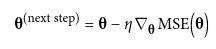

Let’s look at a quick implementation of this algorithm:

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.1864781 ],
       [2.79171502]])

Hey,  that’s  exactly  what  the  Normal  Equation  found!  Gradient  Descent  worked  perfectly.  But  what  if  you  had  used  a  different  learning  rate  eta?  Figure below  shows  the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

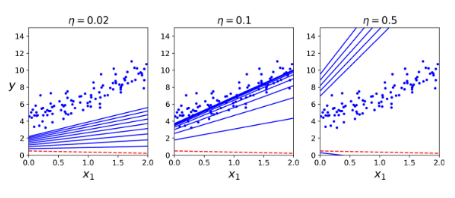

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: injust a few iterations, it has already converged to the solution. On the right, the learning  rate  is  too  high:  the  algorithm  diverges,  jumping  all  over  the  place  and  actually getting further and further away from the solution at every step.To  find  a  good  learning  rate,  you  can  use  grid  search.  However,  youmay  want  to  limit  the  number  of  iterations  so  that  grid  search  can  eliminate  models that take too long to converge. You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will  waste  time  while  the  model  parameters  do  not  change  anymore.  A  simple  solution is to set a very large number of iterations but to interrupt the algorithm when thegradient  vector  becomes  tiny that  is,  when  its  norm  becomes  smaller  than  a  tinynumber  ε  (called  the  tolerance) because  this  happens  when  Gradient  Descent  has (almost) reached the minimum.

### Stochastic Gradient Descent

The  main  problem  with  Batch  Gradient  Descent  is  the  fact  that  it  uses  the  whole training  set  to  compute  the  gradients  at  every  step,  which  makes  it  very  slow  when the  training  set  is  large.  At  the  opposite  extreme,  Stochastic  Gradient  Descent  picks  a random  instance  in  the  training  set  at  every  step  and  computes  the  gradients  based only on that single instance. Obviously, working on a single instance at a time makesthe algorithm much faster because it has very little data to manipulate at every iteration.  It  also  makes  it  possible  to  train  on  huge  training  sets,  since  only  one  instance needs  to  be  in  memory  at  each  iteration  (Stochastic  GD  can  be  implemented  as  an out-of-core algorithm). On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the  minimum,  the  cost  function  will  bounce  up  and  down,  decreasing  only  on  average. Over time it will end up very close to the minimum, but once it gets there it will continue  to  bounce  around,  never  settling  down.  So  once  the  algorithm stops, the final parameter values are good, but not optimal.

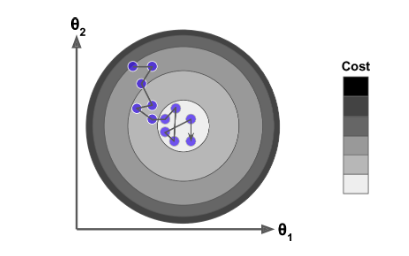

When the cost function is very irregular, this can actually help the algorithm  jump  out  of  local  minima,  so  Stochastic  Gradient  Descent  has  a  better chance of finding the global minimum than Batch Gradient Descent does.


Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma isto  gradually  reduce  the  learning  rate.  The  steps  start  out  large  (which  helps  makequick  progress  and  escape  local  minima),  then  get  smaller  and  smaller,  allowing  the algorithm  to  settle  at  the  global  minimum.  This  process  is  akin  to  simulated  annealing, an algorithm inspired from the process in metallurgy of annealing, where molten metal  is  slowly  cooled  down.  The  function  that  determines  the  learning  rate  at  each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the  learning  rate  is  reduced  too  slowly,  you  may  jump  around  the  minimum  for  along time and end up with a sub optimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) # random initializaton

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

By  convention  we  iterate  by  rounds  of  m  iterations;  each  round  is  called  an  epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training  set,  this  code  goes  through  the  training  set  only  50  times  and  reaches  a  prettygood solution.

In [12]:
theta

array([[4.12859262],
       [2.81336749]])

shows the first 20 steps of training (notice how irregular the steps are).

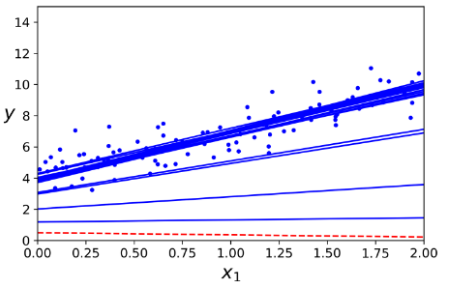

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor  class,  which  defaults  to  optimizing  the  squared  error  cost  function. The  following  code  runs  for  maximum  1,000  epochs  or  until  the  loss  drops  by  lessthan 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate of  0.1  (eta0=0.1),  using  the  default  learning  schedule  (different  from  the  preceding one).  Lastly,  it  does  not  use  any  regularization  (penalty=None;  more  details  on  thisshortly).

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-1, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.07222232]), array([2.86600925]))

Once again the result is quite close to the reasult returned by Normal Equation.

### Mini-batch Gradient Descent

In Mini-batch Gradient Descent instead of computing the gradients based on the full training set(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes  the  gradients  on  small  random  sets  of  instances  called  mini-batches.  The main  advantage  of  Mini-batch  GD  over  Stochastic  GD  is  that  you  can  get  a  performance boost from hardware optimization of matrix operations, especially when usingGPUs.

Gradient Descent paths in parameter space.

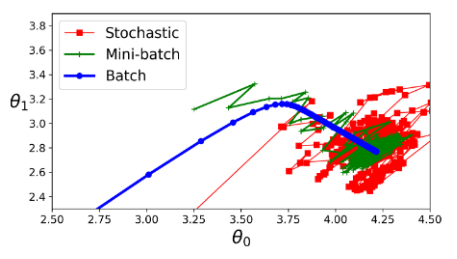

Let’s compare the algorithms we’ve discussed so far for Linear Regression (recall that m is the number of training instances and n is the number of features).

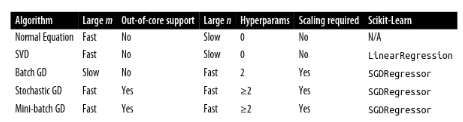

## Polynomial Regression

What  if  your  data  is  more  complex  than  a  straight  line?  Surprisingly,  you  can  use  a linear  model  to  fit  non linear  data.  A  simple  way  to  do  this  is  to  add  powers  of  each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Lets look at an example by creating datapoints of the eqn given in the fig. below:

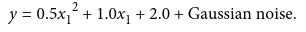

here:

- a = 2
- b = 1
- c = 0.5

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X[:5], y[:5]

(array([[ 1.66264726],
        [ 2.31258817],
        [-1.9334203 ],
        [-0.99380381],
        [-0.1397375 ]]),
 array([[6.8655194 ],
        [5.56647719],
        [1.79968628],
        [2.44605943],
        [1.44533154]]))

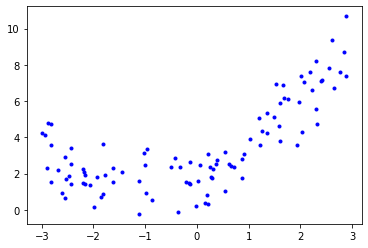

In [15]:
plt.plot(X, y, "b.")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s *PolynomialFeatures*  class  to  transform  our  training  data,  adding  the  square  (second-degree  polynomial)  of  each  feature  in  the  training  set  as  a  new  feature  (in  this  case there is just one feature).

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([1.66264726, 2.76439592])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data.

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85913047]), array([[1.03878058, 0.50056413]]))

After training the approximated values are:

- a = 1.78
- b = 0.99
- c = 0.57

Which are preety close to the original values.

In [18]:
y_pred = lin_reg.predict(X_poly)
print(y_pred[:5],"\n\n", X[:5],"\n\n", y[:5])

[[4.97001359]
 [6.93845117]
 [1.72189683]
 [1.32116655]
 [1.72374817]] 

 [[ 1.66264726]
 [ 2.31258817]
 [-1.9334203 ]
 [-0.99380381]
 [-0.1397375 ]] 

 [[6.8655194 ]
 [5.56647719]
 [1.79968628]
 [2.44605943]
 [1.44533154]]


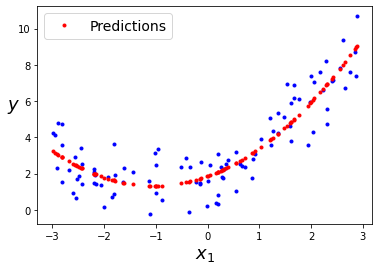

In [19]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r.", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Note that when there are multiple features, Polynomial Regression is capable of finding  relationships  between  features  (which  is  something  a  plain  Linear  Regression model  can not  do).  This  is  made  possible  by  the  fact  that  Polynomial Features  alsoadds  all  combinations  of  features  up  to  the  given  degree.  For  example,  if  there  were two  features  a  and  b,  Polynomial Features  with  degree = 3  would  not  only  add  the features a^2, a^3, b^2, and b^3, but also the combinations a^b, a^2b, and ab^2

**Note: ^ Denotes exponent operator**

## Learning Curves

If  you  perform  high-degree  Polynomial  Regression,  you  will  likely  fit  the  training data much better than with plain Linear Regression. For example, Figure belw applies a  300-degree  polynomial  model  to  the  preceding  training  data,  and  compares  the result  with  a  pure  linear  model  and  a  quadratic  model  (second-degree  polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possi‐ble to the training instances.

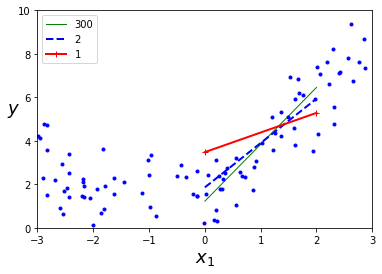

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

This  high-degree  Polynomial  Regression  model  is  severely  overfitting  the  training data,  while  the  linear  model  is  underfitting  it.  The  model  that  will  generalize  best  in this  case  is  the  quadratic  model,  which  makes  sense  because  the  data  was  generated using a quadratic model. But in general you won’t know what function generated the data,  so  how  can  you  decide  how  complex  your  model  should  be?  How  can  you  tell that your model is overfitting or underfitting the data?

Cross-Validation can be used to estimate a model's generalization performance. Another way to tell is to look at the learning curves: these are plots of the model’s per‐formance  on  the  training  set  and  the  validation  set  as  a  function  of  the  training  set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

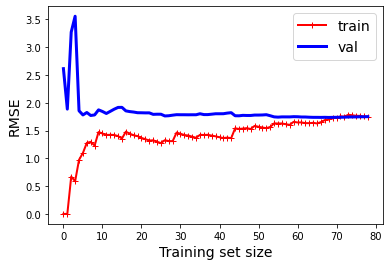

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at  all.  So  the  error  on  the  training  data  goes  up  until  it  reaches  a  plateau,  at  whichpoint  adding  new  instances  to  the  training  set  doesn’t  make  the  average  error  much better  or  worse.

Now  let’s  look  at  the  performance  of  the  model  on  the  validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model  is  shown  more  training  examples,  it  learns,  and  thus  the  validation  errors lowly goes down. However, once again a straight line cannot do a good job modelingthe data, so the error ends up at a plateau, very close to the other curve. These  learning  curves  are  typical  of  a  model  that’s  underfitting.  Both  curves  have reached a plateau; they are close and fairly high.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex modelor come up with better features.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data.

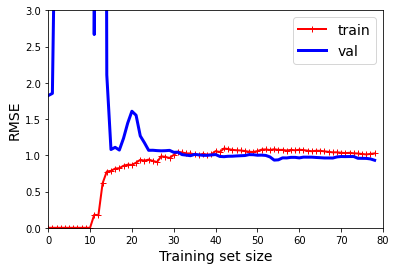

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

These learning curves look a bit like the previous ones, but there are two very important differences:

- The  error  on  the  training  data  is  much  lower  than  with the  Linear  Regression model.

- There  is  a  gap  between  the  curves.  This  means  that  the  model  performs  significantly  better  on  the  training  data  than  on  the  validation  data,  which  is  the  hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

### The Bias/Variance Trade-off

An  important  theoretical  result  of  statistics  and  Machine  Learning  is  the  fact  that  a model’s  generalization  error  can  be  expressed  as  the  sum  of  three  very  different errors:

- Bias

    This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
    
    
- Variance 

    This  part  is  due  to  the  model’s  excessive  sensitivity  to  small  variations  in  thetraining data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.


- Irreducible error

    This  part  is  due  to  the  noisiness  of  the  data  itself.  The  only  way  to  reduce  this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
    
    
Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.

**Note: This notion of bias is not to be confused with the bias term of linear models.**

## Regularized Linear Models

A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights ofthe model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

### Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal as shown in equation below is added to the cost function.  This  forces  the  learning  algorithm  to  not  only  fit  the  data  but  also  keep  the  model weights  as  small  as  possible.  Note  that  the  regularization  term  should  only  be  added to  the  cost  function  during  training.  Once  the  model  is  trained,  you  want  to  use  the unregularized performance measure to evaluate the model’s performance.

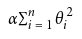

It is quite common for the cost function used during training to be different  from  the  performance  measure  used  for  testing.  Apart from regularization, another reason they might be different is that a good training   cost   function   should   have   optimization-friendly derivatives, while the performance measure used for testing shouldbe as close as possible to the final objective. For example, classifiersare  often  trained  using  a  cost  function  such  as  the  log  loss  (dis‐cussed in a moment) but evaluated using precision/recall.

The hyperparameter α controls how much you want to regularize the model. If α = 0,then Ridge Regression is just Linear Regression. If α is very large, then all weights endup very close to zero and the result is a flat line going through the data’s mean. The equation below presents the Ridge Regression Cost Function.

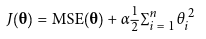

Note  that  the  bias  term  θ0  is  not  regularized  (the  sum  starts  at  i  =  1,  not  0).

It is common to use the notation J(θ) for cost functions that don’t have a short name.

It  is  important  to  scale  the  data  (e.g.,  using  a  StandardScaler)before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Figure below shows several Ridge models trained on some linear data using different α values. On the left, plain Ridge models are used, leading to linear predictions. On theright,  the  data  is  first  expanded  using  PolynomialFeatures(degree=10),  then  it  isscaled using a StandardScaler, and finally the Ridge models are applied to the resulting  features:  this  is  Polynomial  Regression  with  Ridge  regularization.  Note  how increasing  α  leads  to  flatter  (i.e.,  less  extreme,  more  reasonable)  predictions,  thus reducing the model’s variance but increasing its bias.

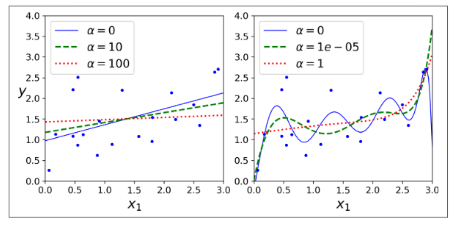

Equation below shows the closed-form solution, where **A** is the (n+1)*\(n+1) identity matrix, except with a 0 in the top-left cell, corresponding to the bias term.

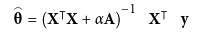

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution  (a  variant  of  above equation that  uses  a  matrix  factorization  technique  by  André-Louis Cholesky).

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82868429]])

And using Stochastic Gradient Descent:

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.80376142])

The  penalty  hyperparameter  sets  the  type  of  regularization  term  to  use.  Specifying "l2"  indicates  that  you  want  SGD  to  add  a  regularization  term  to  the  cost  functionequal  to  half  the  square  of  the  ℓ2  norm  of  the  weight  vector:  this  is  simply  RidgeRegression.

### Lasso Regression

Least  Absolute  Shrinkage  and  Selection  Operator  Regression  (usually  simply  called Lasso  Regression)  is  another  regularized  version  of  Linear  Regression:  just  like  RidgeRegression, it adds a regularization term to the cost function, but it uses the ℓ1 normof the weight vector instead of half the square of the ℓ2 norm.

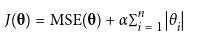

Shows  the  same  thing  as Figure in Ridge regression but  replaces  Ridge  models  withLasso models and uses smaller α values.

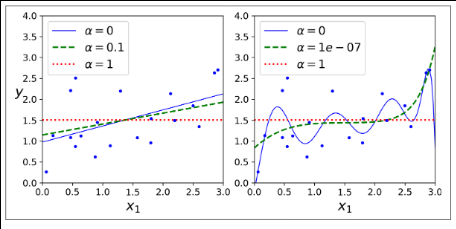
An  important  characteristic  of  Lasso  Regression  is  that  it  tends  to  eliminate  the weights  of  the  least  important  features  (i.e.,  set  them  to  zero).  For  example,  the dashed  line  in  the  righthand  plot  in  above figure  (with  α  =  10-7)  looks  quadratic, almost  linear:  all  the  weights  for  the  high-degree  polynomial  features  are  equal  to zero.  In  other  words,  Lasso  Regression  automatically  performs  feature  selection  and outputs a sparse model (i.e., with few nonzero feature weights).You can get a sense of why this is the case by looking at Figure below: the axes repre‐sent  two  model  parameters,  and  the  background  contours  represent  different  lossfunctions.  In  the  topleft  plot,  the  contours  represent  the  ℓ1  loss  (|θ1|  +  |θ2|),  whichdrops  linearly  as  you  get  closer  to  any  axis.  For  example,  if  you  initialize  the  model parameters  to  θ1  =  2  and  θ2  =  0.5,  running  Gradient  Descent  will  decrement  both parameters equally (as represented by the dashed yellow line); therefore θ2 will reach 0  first  (since  it  was  closer  to  0  to  begin  with).  After  that,  Gradient  Descent  will  rolldown the gutter until it reaches θ1 = 0 (with a bit of bouncing around, since the gradi‐ents of ℓ1 never get close to 0: they are either –1 or 1 for each parameter). In the top-right plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plusan ℓ1 loss). The small white circles show the path that Gradient Descent takes to optimize  some  model  parameters  that  were  initialized  around  θ1  =  0.25  and  θ2  =  –1: notice once again how the path quickly reaches θ2 = 0, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased α, the global optimum would move left along the dashed yellow line, while if we decreased α, the global optimum would move right (in this example, the optimalparameters for the unregularized MSE are θ1 = 2 and θ2 = 0.5).

In [26]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

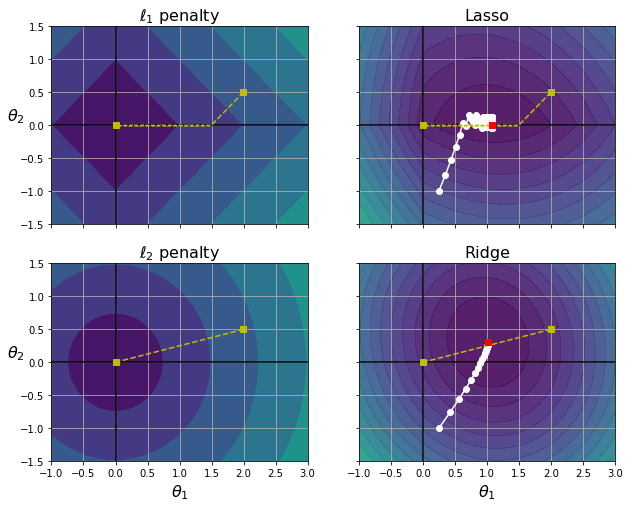

In [27]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
        
plt.show()

An  important  characteristic  of  Lasso  Regression  is  that  it  tends  to  eliminate  the weights  of  the  least  important  features  (i.e.,  set  them  to  zero).  For  example,  the dashed  line  in  the  right hand  plot  in  above figure  (with  α  =  10-7)  looks  quadratic, almost  linear:  all  the  weights  for  the  high-degree  polynomial  features  are  equal  to zero.  In  other  words,  Lasso  Regression  automatically  performs  feature  selection  and outputs a sparse model (i.e., with few non zero feature weights).You can get a sense of why this is the case by looking at Figure above: the axes represent  two  model  parameters,  and  the  background  contours  represent  different  loss functions.  In  the  top left  plot,  the  contours  represent  the  ℓ1  loss  (|θ1|  +  |θ2|),  whichdrops  linearly  as  you  get  closer  to  any  axis.  For  example,  if  you  initialize  the  model parameters  to  θ1  =  2  and  θ2  =  0.5,  running  Gradient  Descent  will  decrement  both parameters equally (as represented by the dashed yellow line); therefore θ2 will reach 0  first  (since  it  was  closer  to  0  to  begin  with).  After  that,  Gradient  Descent  will  rolldown the gutter until it reaches θ1 = 0 (with a bit of bouncing around, since the gradients of ℓ1 never get close to 0: they are either –1 or 1 for each parameter). In the top-right plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plusan ℓ1 loss). The small white circles show the path that Gradient Descent takes to optimize  some  model  parameters  that  were  initialized  around  θ1  =  0.25  and  θ2  =  –1: notice once again how the path quickly reaches θ2 = 0, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased α, the global optimum would move left along the dashed yellow line, while if we decreased α, the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are θ1 = 2 and θ2 = 0.5).

The  two  bottom  plots  show  the  same  thing  but  with  an  ℓ2  penalty  instead.  In  thebottom-left plot, you can see that the ℓ2 loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. In the bottom-right plot, the contours represent Ridge Regression’s cost function (i.e., an MSE cost function  plus  an  ℓ2  loss).  There  are  two  main  differences  with  Lasso.  First,  the  gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally  slows  down,  which  helps  convergence  (as  there  is  no  bouncing  around).  Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase α, but they never get eliminated entirely.

Lasso Regression subgradient vector is mathematically represented as:

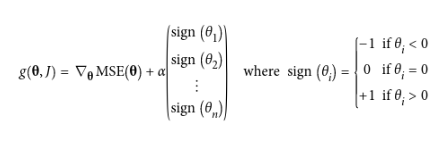

Here is a small Scikit-Learn example using the Lasso class:

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.78478246])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization  term  is  a  simple  mix  of  both  Ridge  and  Lasso’s  regularization  terms, and  you  can  control  the  mix  ratio  r.  When  r  =  0,  Elastic  Net  is  equivalent  to  RidgeRegression, and when r = 1, it is equivalent to Lasso Regression.

Elastic Net cost function is given as:

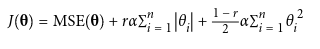

So  when  should  you  use  plain  Linear  Regression  (i.e.,  without  any  regularization),Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as  we  have  discussed.  In  general,  Elastic  Net  is  preferred  over  Lasso  because  Lasso may  behave  erratically  when  the  number  of  features  is  greater  than  the  number  of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78783154])

### Early Stopping

A  very  different  way  to  regularize  iterative  learning  algorithms  such  as  GradientDescent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure below shows a complex model (in this case, a high-degreePolynomial  Regression  model)  being  trained  with  Batch  Gradient  Descent.  As  the epochs  go  by  the  algorithm  learns,  and  its  prediction  error  (RMSE)  on  the  training set  goes  down,  along  with  its  prediction  error  on  the  validation  set.  After  a  whilethough, the validation error stops decreasing and starts to go back up. This indicates that  the  model  has  started  to  overfit  the  training  data.  With  early  stopping  you  just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

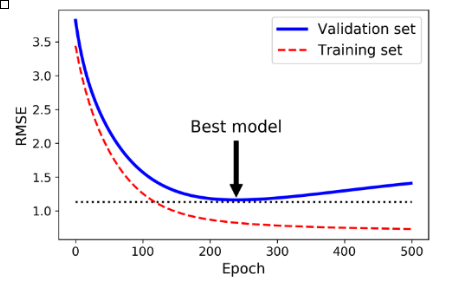

Here is a basic implementation of early stopping:

In [30]:
from sklearn.base import clone


np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Note that with warm_start=True, when the fit() method is called it continues training where it left off, instead of restarting from scratch.

## Logistic Regression

Some regression algorithms can be used for classification  (and  vice  versa).  Logistic  Regression  (also  called  Logit  Regression)  is  commonly used  to  estimate  the  probability  that  an  instance  belongs  to  a  particular  class  (e.g.,what is the probability that this email is spam?). If the estimated probability is greater than  50%,  then  the  model  predicts  that  the  instance  belongs  to  that  class  (called  the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

Logistic Regression model estimating probability (vectorized  form):

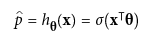

The logistic noted σ(·) is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. It is defined as shown in equation below.

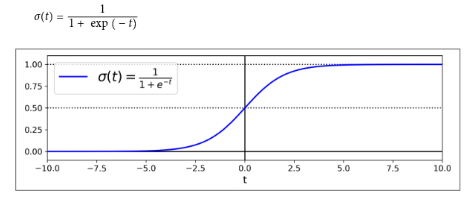

Once  the  Logistic  Regression  model  has  estimated  the  probability  p  =  hθ(x)  that  an instance x belongs to the positive class, it can make its prediction ŷ easily.

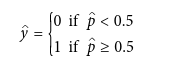

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if x⊺θ is positive and 0 if it is negative.

The score t is often called the logit. The name comes from the fact that  the  logit  function,  defined  as  logit(p)  =  log(p  /  (1  –  p)),  is  the inverse of the logistic function. Indeed, if you compute the logit of the  estimated  probability  p,  you  will  find  that  the  result  is  t.  The logit  is  also  called  the  log-odds,  since  it  is  the  log  of  the  ratio between  the  estimated  probability  for  the  positive  class  and  the estimated probability for the negative class.

### Training and Cost Function

Now  you  know  how  a  Logistic  Regression  model  estimates  probabilities  and  makes predictions.  But  how  is  it  trained?  The  objective  of  training  is  to  set  the  parameter vector  θ  so  that  the  model  estimates  high  probabilities  for  positive  instances  (y  =  1)and low probabilities for negative instances (y = 0). This idea is captured by the costfunction shown in equation below for a single training instance x.

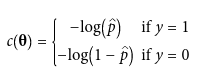

This cost function makes sense because –log(t) grows very large when t approaches 0, so  the  cost  will  be  large  if  the  model  estimates  a  probability  close  to  0  for  a  positive instance,  and  it  will  also  be  very  large  if  the  model  estimates  a  probability  close  to  1 for a negative instance. On the other hand, –log(t) is close to 0 when t is close to 1, so the  cost  will  be  close  to  0  if  the  estimated  probability  is  close  to  0  for  a  negative instance or close to 1 for a positive instance, which is precisely what we want.

The  cost  function  over  the  whole  training  set  is  the  average  cost  over  all  training instances.  It  can  be  written  in  a  single  expression  called  the  log  loss,  shown  in equation below:

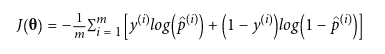

The bad news is that there is no known closed-form equation to compute the value of θ  that  minimizes  this  cost  function  (there  is  no  equivalent  of  the  Normal  Equation).The good news is that this cost function is convex, so Gradient Descent (or any other optimization  algorithm)  is  guaranteed  to  find  the  global  minimum  (if  the  learning rate  is  not  too  large  and  you  wait  long  enough).  The  partial  derivatives  of  the  cost function with regard to the jth model parameter θj are given by:

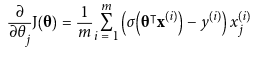

### Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains  the  sepal  and  petal  length  and  width  of  150  iris  flowers  of  three  different species: Iris setosa, Iris versicolor, and Iris virginica.

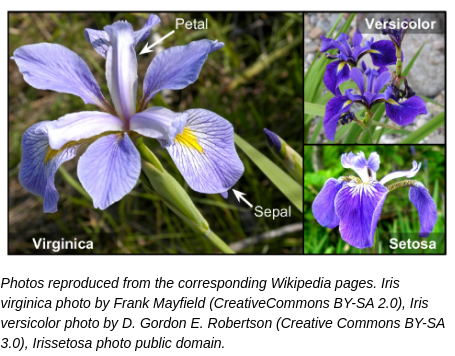

*Photos reproduced from the corresponding Wikipedia pages. Iris virginica photo by Frank Mayfield (CreativeCommons BY-SA 2.0), Iris versicolor photo by D. Gordon E. Robertson (Creative Commons BY-SA 3.0), Irissetosa photo public domain.*

Let’s  try  to  build  a  classifier  to  detect  the  Iris  virginica  type  based  only  on  the  petal width feature. First let’s load the data:

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [32]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

Now let's train a Logistic Regression model:

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm:

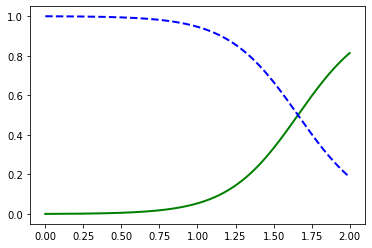

In [35]:
X_new = np.linspace(0, 2, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

Making the figure a bit fancier.

/home/susang/Documents/sunyata/self/HOML-Exercises/venv/lib/python3.9/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


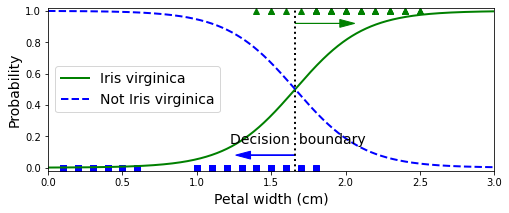

In [36]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to  2.5  cm,  while  the  other  iris  flowers  (represented  by  squares)  generally  have  a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of over‐lap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica  (it  outputs  a  high  probability  for  that  class),  while  below  1  cm  it  is  highly confident  that  it  is  not  an  Iris  virginica  (high  probability  for  the  “Not  Iris  virginica” class).  In  between  these  extremes,  the  classifier  is  unsure.  However,  if  you  ask  it  to predict  the  class  (using  the  predict()  method  rather  than  the  predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decisionboundary  at  around  1.6  cm  where  both  probabilities  are  equal  to  50%:  if  the  petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virgin‐ica, and otherwise it will predict that it is not (even if it is not very confident).

In [37]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

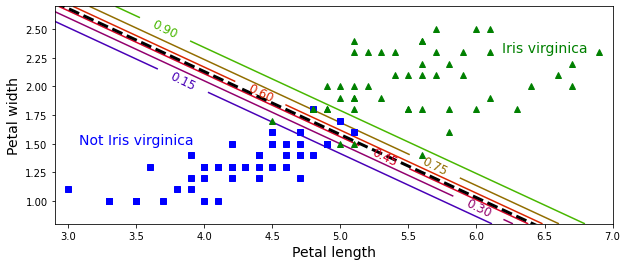

In [38]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

Figure above shows the same dataset, but this time displaying two features: petal width and  length.  Once  trained,  the  Logistic  Regression  classifier  can,  based  on  these  two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90%(top  right).  All  the  flowers  beyond  the  top right  line  have  an  over  90%  chance  of being Iris virginica, according to the model.

Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties. Scikit-Learn actually adds an ℓ2 penalty by default.

The  hyperparameter  controlling  the  regularization  strength  of  a Scikit-Learn  Logistic Regression  model  is  not  alpha  (as  in  other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without  having  to  train  and  combine  multiple  binary  classifiers. This is called Softmax Regression, or Multinomial Logistic Regression. The  idea  is  simple:  when  given  an  instance  x,  the  Softmax  Regression  model  first computes a score s<sub>k</sub>(x) for each class k, then estimates the probability of each class by applying  the  softmax  function  (also  called  the  normalized  exponential)  to  the  scores. The equation to compute s<sub>k</sub>(x) should look familiar, as it is just like the equation for Linear Regression prediction. The equation for softmax score for class k is given as:

s<sub>k</sub>(X) = X<sup>T</sup>θ<sup>(k)</sup>

Note that each class has its own dedicated parameter vector θ(k). All these vectors aretypically stored as rows in a parameter matrix Θ.

Once you have computed the score of every class for the instance x, you can estimate the  probability  p<sub>k</sub>  that  the  instance  belongs  to  class  k  by  running  the  scores  through the  softmax  function given below.  The  function  computes  the  exponential  of every score, then normalizes them (dividing by the sum of all the exponentials). The scores  are  generally  called  logits  or  log-odds  (although  they  are  actually  unnormalized log-odds).

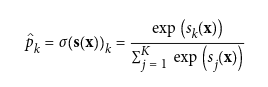

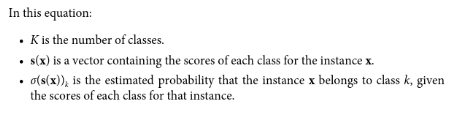

Just  like  the  Logistic  Regression  classifier,  the  Softmax  Regression  classifier  predicts the  class  with  the  highest  estimated  probability  (which  is  simply  the  class  with  the highest score), as shown in equation below.

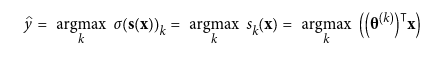
The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability σ(s(x))<sub>k</sub>

The  Softmax  Regression  classifier  predicts  only  one  class  at  a  time(i.e.,  it  is  multiclass,  not  multioutput),  so  it  should  be  used  only with  mutually  exclusive  classes,  such  as  different  types  of  plants. You cannot use it to recognize multiple people in one picture.

Now  that  you  know  how  the  model  estimates  probabilities  and  makes  predictions, let’s  take  a  look  at  training.  The  objective  is  to  have  a  model  that  estimates  a  high probability  for  the  target  class  (and  consequently  a  low  probability  for  the  otherclasses).  Minimizing  the  cost  function  shown  in  Equation  below,  called  the  crossentropy, should lead to this objective because it penalizes the model when it estimatesa low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes. Equation for cross-entropy cost function:
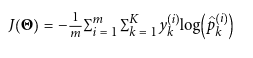

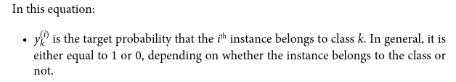
Notice that when there are just two classes (K = 2), this cost function is equivalent tothe Logistic Regression’s cost function.

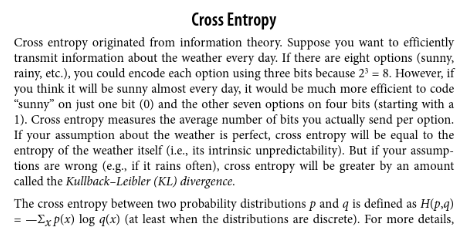
Check this [video](https://www.youtube.com/watch?v=ErfnhcEV1O8).

The gradient vector of this cost function with regard to θ<sup>(k)</sup> is given by (Cross entropy gradient vector for class k):

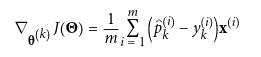

Now you can compute the gradient vector for every class, then use Gradient Descent(or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

Let’s  use  Softmax  Regression  to  classify  the  iris  flowers  into  all  three  classes.  Scikit-Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can control usingthe hyperparameter C.

In [39]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

So  the  next  time  you  find  an  iris  with  petals  that  are  5  cm  long  and  2  cm  wide,  you can  ask  your  model  to  tell  you  what  type  of  iris  it  is,  and  it  will  answer  Iris  virginica(class 2) with 94.2% probability (or Iris versicolor with 5.8% probability).

In [40]:
softmax_reg.predict([[5, 2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Figure below shows the resulting decision boundaries, represented by the background colors.  Notice  that  the  decision  boundaries  between  any  two  classes  are  linear.  The figure  also  shows  the  probabilities  for  the  Iris  versicolor  class,  represented  by  the curved  lines  (e.g.,  the  line  labeled  with  0.450  represents  the  45%  probability  boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

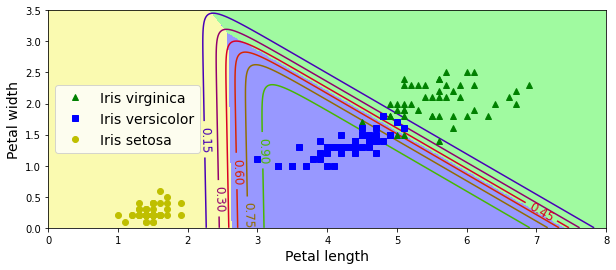

In [42]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 8, 0, 3.5])
plt.show()